In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#loading the dataset

url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url)
print(df)


           date      value
0    1991-07-01   3.526591
1    1991-08-01   3.180891
2    1991-09-01   3.252221
3    1991-10-01   3.611003
4    1991-11-01   3.565869
..          ...        ...
199  2008-02-01  21.654285
200  2008-03-01  18.264945
201  2008-04-01  23.107677
202  2008-05-01  22.912510
203  2008-06-01  19.431740

[204 rows x 2 columns]


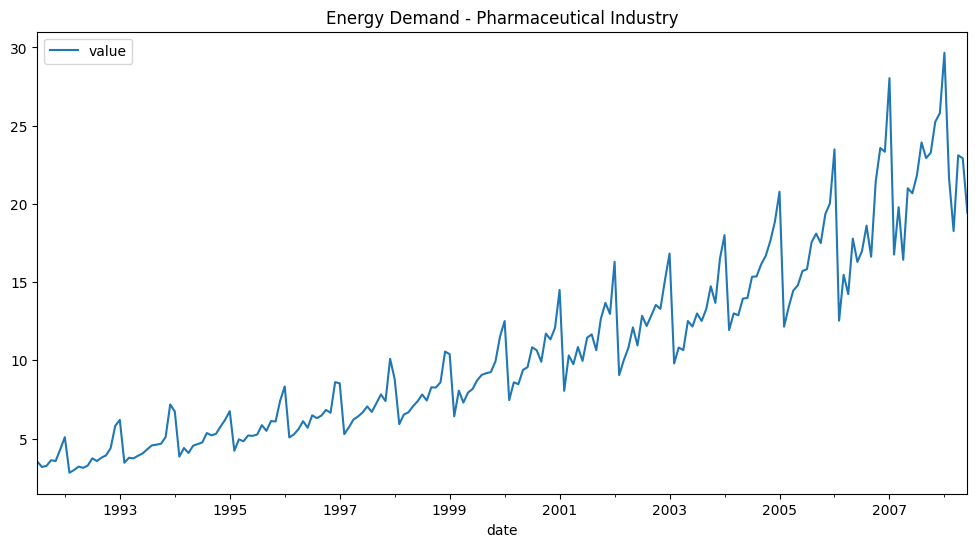

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)

#Plotting it
df.plot(figsize=(12,6), title='Energy Demand - Pharmaceutical Industry')
plt.show()

In [ ]:
#Checking for missing values
print(df.isnull().sum())

date     0
value    0
dtype: int64


# Create lag features (predict current value using the previous one)


In [ ]:
df['prev'] = df['value'].shift(1)
df.dropna(inplace=True)

print(df['prev'])

1       3.526591
2       3.180891
3       3.252221
4       3.611003
5       3.565869
         ...    
199    29.665356
200    21.654285
201    18.264945
202    23.107677
203    22.912510
Name: prev, Length: 203, dtype: float64


# Split train/test

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['prev']]
y = df['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 0.2)


          prev
1     3.526591
2     3.180891
3     3.252221
4     3.611003
5     3.565869
..         ...
199  29.665356
200  21.654285
201  18.264945
202  23.107677
203  22.912510

[203 rows x 1 columns]
1       3.180891
2       3.252221
3       3.611003
4       3.565869
5       4.306371
         ...    
199    21.654285
200    18.264945
201    23.107677
202    22.912510
203    19.431740
Name: value, Length: 203, dtype: float64


Train Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predict

In [ ]:
y_pred = model.predict(X_test)

Plotting

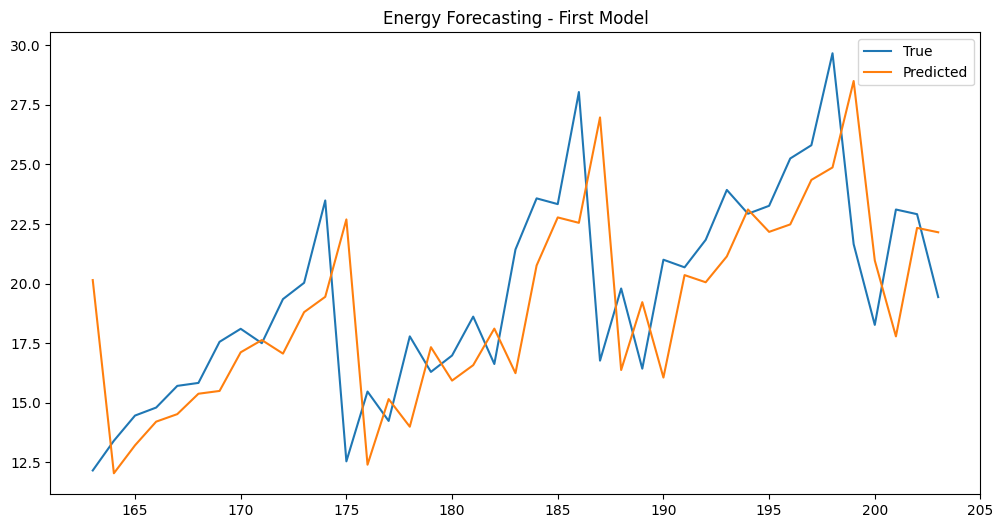

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='True')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title("Energy Forecasting - First Model")
plt.legend()
plt.show()